Re-create the following figure using the `mpg` data set.

In [1]:
library('tidyverse')

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


<img src="figs/example.png" style="width: 600px;" />

Hints:
- you can make a table with median values using `group_by` and `summarize`
- use `geom_crossbar` to create the vertical line for median values
- use `fct_reorder` to set the levels for `class`

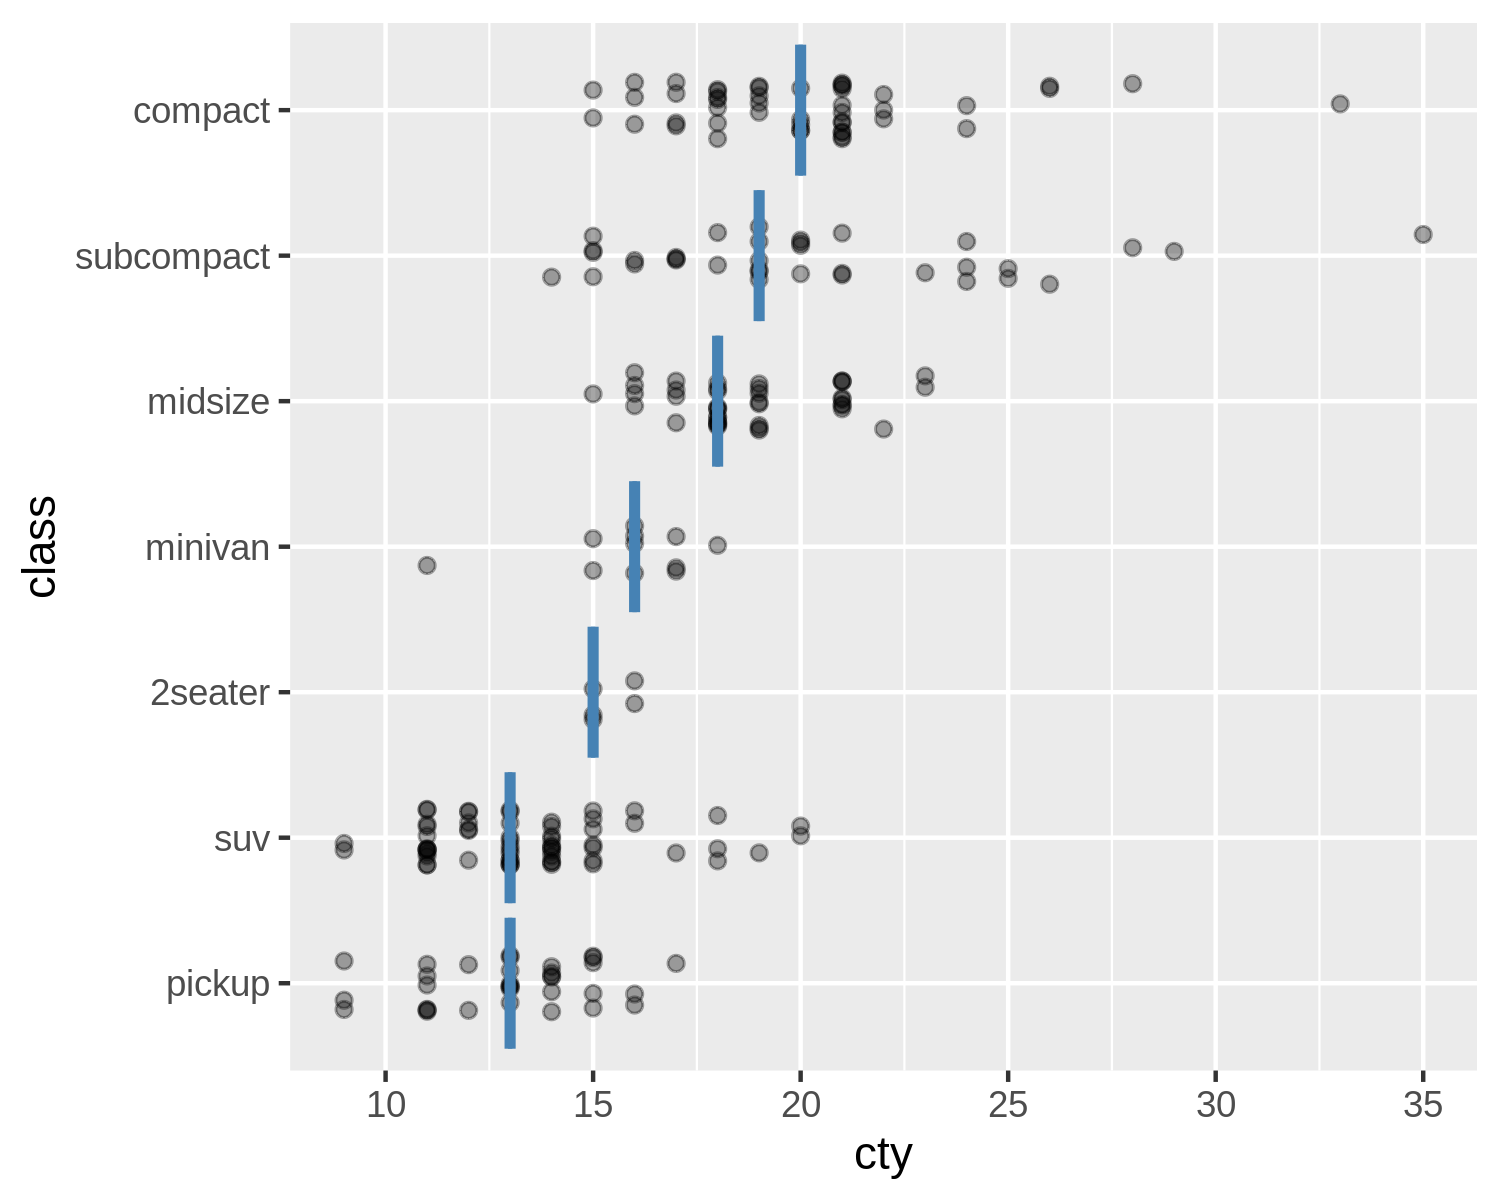

In [8]:
median_values = mpg |>
    group_by(class) |>
    summarise(cty = median(cty))

mpg2 = mpg |>
    mutate(class = fct_reorder(class, cty, .fun = median))

#could order class using code below as an alternative

#mpg2 |>
    #group_by(class) |>
    #mutate(cty_median = median(cty)) |>
    #ungroup() |>
    #arrange(cty_median) |>
    #mutate(class = fct_inorder(class))


p = ggplot(mpg2, aes(x = cty, y = class)) +
    geom_point(alpha = 0.35, position = position_jitter(height = 0.2, width = 0)) +
    #geom_point(data = median_values, color = 'red') +
    geom_crossbar(color = 'steelblue',
                  data = median_values, mapping = aes(xmin = cty, xmax = cty))


p